In [252]:
import folium
import json
import webbrowser
import requests
import json
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import os
import webbrowser
import folium
from folium import plugins
from bokeh.models import *
from bokeh.plotting import *
from bokeh.io import *
from bokeh.tile_providers import *
from bokeh.palettes import *
from bokeh.transform import *
from bokeh.layouts import *
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
data = pd.read_csv("C:/Users/user/samsung_dataset.csv", low_memory=False, encoding='CP949')

In [173]:
grouped = data.groupby([data['ENGINE'], data['DETAIL']])

In [174]:
grouped.count()

ID  CAR_YEAR  GENDER     AGE    SIDO   GUNGU  \
ENGINE  DETAIL                                                            
1.6 GTe LE              73524     73524   73524   73524   72663   72663   
        LE Plus        210274    210274  210274  210274  209042  209042   
        RE              44649     44649   44649   44649   44238   44238   
        SE              11410     11410   11410   11410   11402   11402   
TCe 260 LE              13999     13999   13999   13999   13999   13999   
        RE             135274    135274  135274  135274  135272  135272   
        RE Signature   501440    501440  501440  501440  500810  500810   
        RE Signature+      86        86      86      86      86      86   

                       Unnamed: 8   CH_NM   CH_NF  STORE_NM  STORE_SIDO  \
ENGINE  DETAIL                                                            
1.6 GTe LE                      0   73524   73524     73524       41056   
        LE Plus                 0  210274  210274    210274      113112   
        RE                      0   44649   44649     44649       23462   
        SE                      0   11410   11410     11410        5898   
TCe 260 LE                      0   13999   13999     13999        7086   
        RE                      0  135274  135274    135274       73770   
        RE Signature            0  501440  501440    501440      263041   
        RE Signature+           0      86      86        86          25   

                       STORE_GUNGU    DATE   CTGR1   CTGR2   CTGR3   BRAND  \
ENGINE  DETAIL                                                               
1.6 GTe LE                   41056   73524   73524   73524   73524   68729   
        LE Plus             113112  210274  210274  210274  210274  197016   
        RE                   23462   44649   44649   44649   44649   41459   
        SE                    5898   11410   11410   11410   11410   10777   
TCe 260 LE                    7086   13999   13999   13999   13999   13003   
        RE                   73770  135274  135274  135274  135274  126758   
        RE Signature        263041  501440  501440  501440  501440  470724   
        RE Signature+           25      86      86      86      86      78   

                       PRD_NM      CT      AM  
ENGINE  DETAIL                                 
1.6 GTe LE              73524   73524   73524  
        LE Plus        210274  210274  210274  
        RE              44649   44649   44649  
        SE              11410   11410   11410  
TCe 260 LE              13999   13999   13999  
        RE             135274  135274  135274  
        RE Signature   501440  501440  501440  
        RE Signature+      86      86      86

In [5]:
col = data.groupby([data['ENGINE'], data['DETAIL']])['GENDER'].value_counts().unstack(level=2).T
col= data.groupby([data['ENGINE'], data['DETAIL']])['AGE'].value_counts().unstack(level=2).T
col= data.groupby([data['ENGINE'], data['DETAIL']])['SIDO'].value_counts().unstack(level=2).T
col= data.groupby([data['ENGINE'], data['DETAIL']])['GUNGU'].value_counts().unstack(level=2).T
col= data.groupby([data['ENGINE'], data['DETAIL']])['CH_NM'].value_counts().unstack(level=2).T
col= data.groupby([data['ENGINE'], data['DETAIL']])['CTGR1'].value_counts().unstack(level=2).T
col= data.groupby([data['ENGINE'], data['DETAIL']])['CTGR2'].value_counts().unstack(level=2).T
col= data.groupby([data['ENGINE'], data['DETAIL']])['CTGR3'].value_counts().unstack(level=2).T

In [6]:
k = data.groupby([data['ENGINE'], data['DETAIL']])['CTGR3'].value_counts().unstack(level=2).T
k.append(data.groupby([data['ENGINE'], data['DETAIL']])['CTGR2'].value_counts().unstack(level=2).T)
k.append(data.groupby([data['ENGINE'], data['DETAIL']])['CTGR1'].value_counts().unstack(level=2).T)
k.append(data.groupby([data['ENGINE'], data['DETAIL']])['CH_NM'].value_counts().unstack(level=2).T)
k.append(data.groupby([data['ENGINE'], data['DETAIL']])['GUNGU'].value_counts().unstack(level=2).T)
k.append(data.groupby([data['ENGINE'], data['DETAIL']])['SIDO'].value_counts().unstack(level=2).T)
k.append(data.groupby([data['ENGINE'], data['DETAIL']])['AGE'].value_counts().unstack(level=2).T)
k.append(data.groupby([data['ENGINE'], data['DETAIL']])['GENDER'].value_counts().unstack(level=2).T)

ENGINE         1.6 GTe                            TCe 260           \
DETAIL              LE   LE Plus       RE      SE      LE       RE   
2단우산               1.0       5.0      1.0     NaN     NaN      4.0   
3단우산               2.0       6.0      NaN     1.0     NaN     12.0   
BB/파운데이션/컴팩트류     27.0      58.0     21.0     NaN     4.0     46.0   
CA/TV홈쇼핑           2.0       4.0      3.0     2.0     NaN     13.0   
CDP/카세트            NaN       1.0      NaN     NaN     NaN      NaN   
...                ...       ...      ...     ...     ...      ...   
힙색/사이드백            1.0       NaN      NaN     NaN     NaN      NaN   
ＰＣ방                5.0      37.0      1.0     3.0     1.0    109.0   
남              17327.0   68360.0  11210.0  5003.0  7018.0  55110.0   
미상                43.0      15.0     27.0     8.0     NaN      NaN   
여              56154.0  141899.0  33412.0  6399.0  6981.0  80164.0   

ENGINE                                    
DETAIL        RE Signature RE Signature+  
2단우산                   3.0           NaN  
3단우산                  11.0           NaN  
BB/파운데이션/컴팩트류        171.0           NaN  
CA/TV홈쇼핑              18.0           NaN  
CDP/카세트                1.0           NaN  
...                    ...           ...  
힙색/사이드백                2.0           NaN  
ＰＣ방                  608.0           NaN  
남                 220954.0           3.0  
미상                   226.0           NaN  
여                 280260.0          83.0  

[2176 rows x 8 columns]

In [7]:
col

ENGINE        1.6 GTe                    TCe 260                      \
DETAIL             LE LE Plus    RE   SE      LE     RE RE Signature   
CTGR3                                                                  
2단우산              1.0     5.0   1.0  NaN     NaN    4.0          3.0   
3단우산              2.0     6.0   NaN  1.0     NaN   12.0         11.0   
BB/파운데이션/컴팩트류    27.0    58.0  21.0  NaN     4.0   46.0        171.0   
CA/TV홈쇼핑          2.0     4.0   3.0  2.0     NaN   13.0         18.0   
CDP/카세트           NaN     1.0   NaN  NaN     NaN    NaN          1.0   
...               ...     ...   ...  ...     ...    ...          ...   
흉부외과              NaN     3.0   NaN  NaN     NaN    NaN          3.0   
흑미                7.0    23.0   7.0  NaN     2.0   17.0         45.0   
히터                2.0     1.0   NaN  NaN     1.0    NaN          7.0   
힙색/사이드백           1.0     NaN   NaN  NaN     NaN    NaN          2.0   
ＰＣ방               5.0    37.0   1.0  3.0     1.0  109.0        608.0   

ENGINE                       
DETAIL        RE Signature+  
CTGR3                        
2단우산                    NaN  
3단우산                    NaN  
BB/파운데이션/컴팩트류           NaN  
CA/TV홈쇼핑                NaN  
CDP/카세트                 NaN  
...                     ...  
흉부외과                    NaN  
흑미                      NaN  
히터                      NaN  
힙색/사이드백                 NaN  
ＰＣ방                     NaN  

[2173 rows x 8 columns]

In [8]:
for column_name, item in data.iteritems():
    col= data.groupby([data['ENGINE'], data['DETAIL']])[column_name].value_counts()
    col.to_csv('my_csv.csv', mode='a', header=False)

In [9]:
data.groupby([data['ENGINE'], data['DETAIL']])['GENDER'].value_counts(normalize=True).unstack(level=2).T.to_csv("koko5.csv",mode='w', header=True)
data.groupby([data['ENGINE'], data['DETAIL']])['AGE'].value_counts(normalize=True).unstack(level=2).T.to_csv("koko5.csv",mode='a', header=True)
data.groupby([data['ENGINE'], data['DETAIL']])['SIDO'].value_counts(normalize=True).unstack(level=2).T.to_csv("koko5.csv",mode='a', header=True)
data.groupby([data['ENGINE'], data['DETAIL']])['GUNGU'].value_counts(normalize=True).unstack(level=2).T.to_csv("koko5.csv",mode='a', header=True)
data.groupby([data['ENGINE'], data['DETAIL']])['CH_NM'].value_counts(normalize=True).unstack(level=2).T.to_csv("koko5.csv",mode='a', header=True)
data.groupby([data['ENGINE'], data['DETAIL']])['CTGR1'].value_counts(normalize=True).unstack(level=2).T.to_csv("koko5.csv",mode='a', header=True)
data.groupby([data['ENGINE'], data['DETAIL']])['CTGR2'].value_counts(normalize=True).unstack(level=2).T.to_csv("koko5.csv",mode='a', header=True)
data.groupby([data['ENGINE'], data['DETAIL']])['CTGR3'].value_counts(normalize=True).unstack(level=2).T.to_csv("koko5.csv",mode='a', header=True)

data.groupby([data['ENGINE'], data['DETAIL']])['GENDER'].value_counts().unstack(level=2).T.to_csv("koko.csv",mode='a', header=False))

In [10]:
data.groupby([data['ENGINE'], data['DETAIL']])['GENDER'].value_counts()

ENGINE   DETAIL         GENDER
1.6 GTe  LE             여          56154
                        남          17327
                        미상            43
         LE Plus        여         141899
                        남          68360
                        미상            15
         RE             여          33412
                        남          11210
                        미상            27
         SE             여           6399
                        남           5003
                        미상             8
TCe 260  LE             남           7018
                        여           6981
         RE             여          80164
                        남          55110
         RE Signature   여         280260
                        남         220954
                        미상           226
         RE Signature+  여             83
                        남              3
Name: GENDER, dtype: int64

idx = a.index.levels
c = len(idx[1])

In [12]:
data.groupby([data['ENGINE'], data['DETAIL']])['GENDER'].value_counts(normalize=True).unstack(level=2).T

ENGINE   1.6 GTe                                 TCe 260            \
DETAIL        LE   LE Plus        RE        SE        LE        RE   
GENDER                                                               
남       0.235665  0.325100  0.251069  0.438475  0.501322  0.407395   
미상      0.000585  0.000071  0.000605  0.000701       NaN       NaN   
여       0.763751  0.674829  0.748326  0.560824  0.498678  0.592605   

ENGINE                             
DETAIL RE Signature RE Signature+  
GENDER                             
남          0.440639      0.034884  
미상         0.000451           NaN  
여          0.558910      0.965116

pd.set_option('display.max_rows', 10000)

In [359]:
a = data.groupby([data['ENGINE'], data['DETAIL']])['SIDO'].value_counts()
b= a.unstack(level=2)
state_data = b.T*100
state_data


dist_df = state_data.reset_index(level=[0])
dist_df['sum'] = dist_df.sum(axis=1)
dist_df

C:\Users\user\AppData\Local\Temp/ipykernel_23776/1747622388.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dist_df['sum'] = dist_df.sum(axis=1)


ENGINE SIDO    1.6 GTe                                   TCe 260             \
DETAIL              LE    LE Plus         RE        SE        LE         RE   
0        강원   178400.0   419500.0   182000.0   49200.0   30800.0   328900.0   
1        경기  1917300.0  5184800.0  1397100.0  312100.0  271400.0  4380200.0   
2        경남   619700.0  2771800.0   298400.0  141400.0   80200.0  1449500.0   
3        경북   203100.0  1038500.0   206200.0    6300.0   35800.0   288200.0   
4        광주   256600.0   781400.0   111100.0   50100.0   23500.0   474600.0   
5        대구   236200.0   572300.0   141700.0    7900.0   35800.0   434600.0   
6        대전   273900.0   561000.0    93700.0    8100.0       NaN   350300.0   
7        부산  1075700.0  1526500.0   245700.0   32400.0   66200.0  1057500.0   
8        서울   608400.0  1976500.0   624600.0  302200.0  344000.0  1676900.0   
9        세종    30000.0    68100.0    11400.0    2000.0       NaN    10600.0   
10       울산    70600.0   438500.0    40000.0    4200.0    1800.0   271700.0   
11       인천   514400.0  1201400.0   215100.0   43700.0  187500.0   656900.0   
12       전남   247500.0  1135000.0   113500.0   40600.0  117600.0   718800.0   
13       전북   566300.0  1024600.0   131800.0   48200.0   80600.0   643100.0   
14       제주    84500.0   145000.0   106900.0    3000.0     100.0    71000.0   
15       충남   150200.0  1027200.0   113900.0   74500.0   29000.0   339200.0   
16       충북   233500.0  1032100.0   390700.0   14300.0   95600.0   375200.0   

ENGINE                                    sum  
DETAIL RE Signature RE Signature+              
0         1627700.0           NaN   2816500.0  
1        14410100.0         300.0  27873300.0  
2         4787800.0           NaN  10148800.0  
3         1271900.0           NaN   3050000.0  
4         2522000.0           NaN   4219300.0  
5         1178000.0           NaN   2606500.0  
6         1351700.0           NaN   2638700.0  
7         4430500.0        8300.0   8442800.0  
8         5835200.0           NaN  11367800.0  
9          226700.0           NaN    348800.0  
10         845800.0           NaN   1672600.0  
11        2641800.0           NaN   5460800.0  
12        2180100.0           NaN   4553100.0  
13        2375900.0           NaN   4870500.0  
14         599200.0           NaN   1009700.0  
15        2048200.0           NaN   3782200.0  
16        1748400.0           NaN   3889800.0

In [14]:
dist_df.columns.get_level_values(0)
dist_df.columns.values

array([('SIDO', ''), ('1.6 GTe', 'LE'), ('1.6 GTe', 'LE Plus'),
       ('1.6 GTe', 'RE'), ('1.6 GTe', 'SE'), ('TCe 260', 'LE'),
       ('TCe 260', 'RE'), ('TCe 260', 'RE Signature'),
       ('TCe 260', 'RE Signature+'), ('sum', '')], dtype=object)

In [360]:
dist_df.columns = [''.join(col).strip() for col in dist_df.columns.values]
dist_df
dist_df2 = dist_df[['SIDO','sum']]
dist_df2

,SIDO,sum
0,강원,2816500.0
1,경기,27873300.0
2,경남,10148800.0
3,경북,3050000.0
4,광주,4219300.0
5,대구,2606500.0
6,대전,2638700.0
7,부산,8442800.0
8,서울,11367800.0
9,세종,348800.0


In [357]:
a2 = data.groupby([data['ENGINE'], data['DETAIL']])['GUNGU'].value_counts()
b2= a2.unstack(level=2)
gungu_data = b2.T*100
gungu_data


dist_df3 = state_data.reset_index(level=[0])
dist_df3['sum'] = dist_df.sum(axis=1)
dist_df3

C:\Users\user\AppData\Local\Temp/ipykernel_23776/773718309.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dist_df3['sum'] = dist_df.sum(axis=1)


ENGINE       GUNGU   1.6 GTe                              TCe 260            \
DETAIL                    LE   LE Plus        RE      SE       LE        RE   
0           강원 강릉시    4200.0   72100.0     400.0     NaN      NaN       NaN   
1           강원 고성군       NaN     200.0       NaN     NaN      NaN       NaN   
2           강원 동해시       NaN    1000.0     900.0     NaN      NaN    1100.0   
3           강원 삼척시     300.0     500.0       NaN     NaN      NaN    1000.0   
4           강원 속초시    5600.0   21300.0   10000.0  5700.0      NaN    6400.0   
..             ...       ...       ...       ...     ...      ...       ...   
244     충북 청주시 상당구   59000.0  151400.0    1300.0  4100.0      NaN   84400.0   
245     충북 청주시 서원구    3700.0  169700.0   18500.0     NaN    700.0    5800.0   
246     충북 청주시 청원구   16300.0   41100.0   19600.0   200.0  94500.0   17200.0   
247     충북 청주시 흥덕구   10900.0  210700.0   57300.0  1000.0      NaN  119200.0   
248         충북 충주시  128000.0  287200.0  158100.0  5200.0      NaN   18100.0   

ENGINE                                   sum  
DETAIL RE Signature RE Signature+             
0           44100.0           NaN   241600.0  
1           33800.0           NaN    68000.0  
2            5900.0           NaN    17800.0  
3           44400.0           NaN    92400.0  
4           86400.0           NaN   270800.0  
..              ...           ...        ...  
244        174400.0           NaN   949200.0  
245        139600.0           NaN   676000.0  
246         48300.0           NaN   474400.0  
247        483900.0           NaN  1766000.0  
248        357900.0           NaN  1909000.0  

[249 rows x 10 columns]

In [ ]:
dist_df3.columns = [''.join(col).strip() for col in dist_df.columns.values]
dist_df3
dist_df3 = dist_df[['GUNGU','sum']]

In [394]:
dist_df3


,GUNGU,sum
0,강원 강릉시,120800.0
1,강원 고성군,34000.0
2,강원 동해시,8900.0
3,강원 삼척시,46200.0
4,강원 속초시,135400.0
...,...,...
244,충북 청주시 상당구,474600.0
245,충북 청주시 서원구,338000.0
246,충북 청주시 청원구,237200.0
247,충북 청주시 흥덕구,883000.0


In [401]:
pap=list(dist_df3['GUNGU'].str.split(" "))
pear = []
for i in pap:
    pear.append(i[-1])
pear
dist_df3
pear=pd.DataFrame(pear, columns=['SIG'])
pear
sig_data = dist_df3.join(pear, how='right')
sig_data=sig_data.drop(['GUNGU'],axis=1)
sig_data

,sum,SIG
0,120800.0,강릉시
1,34000.0,고성군
2,8900.0,동해시
3,46200.0,삼척시
4,135400.0,속초시
...,...,...
244,474600.0,상당구
245,338000.0,서원구
246,237200.0,청원구
247,883000.0,흥덕구


In [402]:
m = folium.Map(location=[36, 127], tiles="OpenStreetMap", zoom_start=7)

m.choropleth(
    geo_data=sgg_geo,
    name='구매수',
    data=sig_data,
    columns=['SIG', 'sum'],
    key_on='feature.properties.SIG_KOR_NM',
    fill_color='Blues',
    fill_opacity=0.9,
    line_opacity=0.2,
    color = 'Blues',
    legend_name = 'Purchase'
)

folium.LayerControl().add_to(m)
m
# Save to html

C:\Users\user\anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


SIG_CD

In [16]:
sido_path = 'C:/Users/user/TL_SCCO_CTPRVN_WGS84.json'
sgg_path = 'C:/Users/user/TL_SCCO_SIG_WGS84.json'

In [351]:
sido_geo = json.load(open(sido_path, encoding='utf-8'))
sgg_geo = json.load(open(sgg_path, encoding='utf-8'))

In [361]:
m = folium.Map(location=[36, 127], tiles="OpenStreetMap", zoom_start=7)

m.choropleth(
    geo_data=sido_geo,
    name='구매수',
    data=dist_df2,
    columns=['SIDO', 'sum'],
    key_on='feature.properties.CTP_KOR_NM',
    fill_color='Blues',
    fill_opacity=0.9,
    line_opacity=0.2,
    color = 'Blues',
    legend_name = 'Purchase'
)

folium.LayerControl().add_to(m)
m
# Save to html


C:\Users\user\anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [405]:
#data['GUNGU'].unique()
#sig_data['SIG'].unique()

array(['인천 남동구', '인천 미추홀구', '부산 사하구', '경남 김해시', '대구 수성구', '광주 광산구',
       '충남 논산시', '경기 시흥시', '충북 청주시 흥덕구', '경남 거제시', '부산 기장군', '서울 강서구',
       '경남 양산시', '충남 천안시 서북구', '경기 이천시', '서울 양천구', '세종 -', '경남 창원시 성산구',
       '경기 남양주시', '경기 안양시 만안구', '부산 연제구', '경기 용인시 수지구', '대구 달서구',
       '경기 부천시', '전남 여수시', '제주 제주시', '부산 해운대구', '경기 김포시', '제주 서귀포시',
       '경남 진주시', '서울 은평구', '충남 계룡시', nan, '서울 강동구', '경기 성남시 분당구',
       '서울 동작구', '경기 양주시', '부산 동래구', '경북 구미시', '경기 하남시', '서울 금천구',
       '대구 달성군', '경남 창원시 마산회원구', '경남 창원시 의창구', '경기 의왕시', '경기 안산시 단원구',
       '인천 연수구', '경남 통영시', '경북 칠곡군', '부산 남구', '충북 충주시', '부산 부산진구',
       '전북 익산시', '대전 대덕구', '강원 춘천시', '경기 수원시 권선구', '경기 화성시', '경기 광주시',
       '서울 송파구', '전남 무안군', '부산 수영구', '서울 구로구', '강원 강릉시', '경기 평택시',
       '전북 전주시 덕진구', '서울 영등포구', '부산 동구', '대구 남구', '경기 구리시', '경남 사천시',
       '경기 안성시', '부산 서구', '부산 북구', '울산 동구', '경기 수원시 영통구', '광주 서구',
       '강원 고성군', '인천 서구', '경기 의정부시', '부산 금정구', '인천 중구', '충남 천안시 동남구',
       '대전 서구', '충북 제천시', '서울 노원구', '

In [426]:
k4 = data.groupby('GUNGU')['AM'].sum().to_frame()

k4
k4 = k4.reset_index()

In [428]:
paper=list(k4['GUNGU'].str.split(" "))
pearer = []
for i in paper:
    pearer.append(i[-1])
pearer
k4
pearer=pd.DataFrame(pearer, columns=['SIG'])
pearer
sig_data2 = k4.join(pearer, how='right')
sig_data2=sig_data2.drop(['GUNGU'],axis=1)
sig_data2

,AM,SIG
0,50239728,강릉시
1,7561724,고성군
2,16788480,동해시
3,35433407,삼척시
4,12912476,속초시
...,...,...
244,99657604,상당구
245,70011645,서원구
246,90414739,청원구
247,120913131,흥덕구


In [429]:
m = folium.Map(location=[36, 127], tiles="OpenStreetMap", zoom_start=7)

m.choropleth(
    geo_data=sgg_geo,
    name='구매수',
    data=sig_data2,
    columns=['SIG', 'AM'],
    key_on='feature.properties.SIG_KOR_NM',
    fill_color='Blues',
    fill_opacity=0.9,
    line_opacity=0.2,
    color = 'Blues',
    legend_name = 'Purchase'
)

folium.LayerControl().add_to(m)
m
# Save to html

C:\Users\user\anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [19]:
p=data.groupby([data['ENGINE'], data['DETAIL']])['AM'].sum().to_frame().T
p

ENGINE     1.6 GTe                                      TCe 260              \
DETAIL          LE     LE Plus         RE         SE         LE          RE   
AM      1406227771  4273207361  988238609  187891760  208901838  2731368260   

ENGINE                             
DETAIL RE Signature RE Signature+  
AM      11653070227        461050

In [ ]:
k = data.groupby([data['ENGINE'], data['DETAIL']])['BRAND'].value_counts()
def get_top7(group, n=7):
    tops = group
    return tops(n)
k.apply(get_top7)
    

In [212]:
k = data.groupby([data['ENGINE'], data['DETAIL']])['BRAND'].value_counts().unstack(level=2).fillna(0).T.sort_values(by='BRAND', ascending=False)
k.columns = [''.join(col).strip() for col in k.columns.values]
k.sort_values(by='1.6 GTeLE', ascending=False)
k.sort_values(by='TCe 260RE Signature', ascending=False)

,1.6 GTeLE,1.6 GTeLE Plus,1.6 GTeRE,1.6 GTeSE,TCe 260LE,TCe 260RE,TCe 260RE Signature,TCe 260RE Signature+
BRAND,,,,,,,,
-,18572.0,54741.0,11590.0,2585.0,3158.0,35002.0,134608.0,0.0
리얼후레쉬,3570.0,9563.0,2518.0,577.0,833.0,6643.0,26649.0,0.0
브랜드불명,3836.0,9638.0,2369.0,636.0,804.0,7090.0,24722.0,4.0
초이스엘,2781.0,6413.0,1617.0,491.0,521.0,4797.0,16922.0,0.0
농심,1847.0,5801.0,1098.0,347.0,425.0,3462.0,12141.0,9.0
...,...,...,...,...,...,...,...,...
엘르(우양산),1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
씨스팡,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
동북산업양행,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [246]:
data.groupby('CH_NM')['CTGR1'].value_counts().to_frame().nlargest(25,'CTGR1')

CTGR1
CH_NM CTGR1             
롯데카드  유통          107409
마트    채소           60231
롯데카드  식생활          58319
마트    과자           46548
      대용식          38438
      유제품          32504
      축산물          32212
      냉장식품         30888
      과일           30614
      음료           23024
슈퍼    채소           22659
롯데카드  의료/보험/위생     21434
마트    조미료          21153
      주류           20219
롯데카드  교육/교양/서비스    18141
슈퍼    과자           16388
마트    문구/사무용품      14594
슈퍼    대용식          13315
마트    냉동식품         13083
      수산물          12979
      청소/세탁/욕실용품   12946
K7    음료           12509
슈퍼    유제품          11872
롯데카드  자동차/주유소      11605
슈퍼    냉장식품         10730

In [244]:
data.groupby('CH_NM')['CTGR2'].value_counts().to_frame().nlargest(25,'CTGR2')

CTGR2
CH_NM CTGR2         
롯데카드  전자상거래    53750
      유통업      52781
      음식/요리    33489
마트    스낵류      21690
롯데카드  음료/주류    16815
마트    잎채소      14411
      국산과일     14292
      봉지라면     12877
      요구르트     12743
      두부/콩나물류  12632
      파티/팬시용품  12434
      우유       12113
      수입과일     11337
      비스킷류     11181
      냉동간편식    11096
롯데카드  서비스      10949
마트    청소용품     10646
      열매채소     10578
      레토르트      9977
      맥주        9737
롯데카드  연료        9505
      여행/교통     9344
슈퍼    스낵류       9202
마트    양채류       8911
      계란류       7926

In [247]:
data.groupby('CH_NM')['CTGR3'].value_counts().to_frame().nlargest(25,'CTGR3')

CTGR3
CH_NM CTGR3            
롯데카드  PG(온라인)     28013
      슈퍼마켓        20156
      편의점         19468
      한식(한정식)     13900
      기타일반음식      12122
마트    기타파티/팬시용품   11894
롯데카드  커피전문점       11465
마트    종량제봉투        9745
      일반스낵         9362
      일반우유         9322
롯데카드  간편결제(온라인)    9217
마트    국물봉지라면       9096
롯데카드  PG(오프라인)     8788
      주유소          8650
마트    두부류          7113
      일반계란         7101
슈퍼    종량제봉투        6855
롯데카드  약국           5985
마트    감자스낵         5955
롯데카드  할인점          5848
마트    국물용기라면       5510
      샐러드류         5368
롯데카드  제과점/아이스크림점   5327
마트    바나나          5309
      떠먹는요구르트      5024

In [248]:
data.groupby('CH_NM')['BRAND'].value_counts().to_frame().nlargest(25,'BRAND')

BRAND
CH_NM BRAND          
롯데카드  -        234113
마트    리얼후레쉬     50353
      브랜드불명     42379
      초이스엘      24174
      -         17728
      온리프라이스    16819
      농심        16237
      씨제이제일제당   15756
      오뚜기       15101
      풀무원       10350
      롯데제과      10197
      서울우유       9431
슈퍼    초이스엘       9186
마트    요리하다       7282
      오리온        7040
슈퍼    롯데제과       6743
      브랜드불명      6653
      농심         6188
      씨제이제일제당    6025
마트    해태제과       5782
K7    롯데푸드       5431
마트    하이트진로      5376
슈퍼    오뚜기        5233
마트    롯데칠성음료     5024
이커머스  -          4921

In [250]:
df= data.groupby('CH_NM')['CTGR1'].value_counts().to_frame()
df.index.name = None
df = df.rename_axis(index={'CTGR1' : 'c'})
df

CTGR1
CH_NM c             
K7    음료       12509
      담배        8647
      과자        8197
      주류        6191
      조리식품      5723
...              ...
홈쇼핑   자동차용품        3
      헬스/피트니스      3
      공구/안전용품      1
      음료           1
      조리식품         1

[314 rows x 1 columns]

In [249]:
df_sort_group_top10 = df.sort_values(by="CTGR1", ascending=False).groupby("CH_NM").head(5)
df_sort_group_top10.sort_index(level='CH_NM')

CTGR1
CH_NM c                
K7    과자           8197
      담배           8647
      음료          12509
      조리식품         5723
      주류           6191
롯데카드  교육/교양/서비스   18141
      식생활         58319
      유통         107409
      의료/보험/위생    21434
      자동차/주유소     11605
마트    과자          46548
      대용식         38438
      유제품         32504
      채소          60231
      축산물         32212
백화점   기타           1218
      남성의류         1736
      스포츠          6057
      식품           5803
      여성의류         7236
슈퍼    과자          16388
      냉장식품        10730
      대용식         13315
      유제품         11872
      채소          22659
이커머스  남성의류          747
      스포츠패션         660
      여성의류         1152
      패션잡화          972
      화장품/뷰티케어     1039
홈쇼핑   건강식품          379
      스포츠패션         438
      여성의류         1299
      패션잡화          471
      화장품/뷰티케어      436

# 여성의류 패션잡화 스포츠패션 화장품/뷰티케어 건강식품

k = data.groupby('CH_NM')['CTGR1'].value_counts().to_frame().groupby('CH_NM')
def get_top7(group, key_column, n=7):
    tops = group[key_column]
    return tops(n)
k.apply(get_top7, 'CTGR1')
    

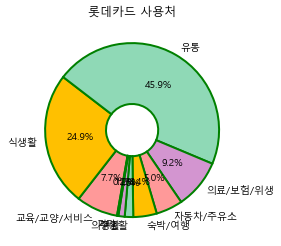

In [51]:
%matplotlib inline
ratio = [18141, 58319, 107409, 21434, 11605, 10211, 3682, 2750, 562]
labels = ['교육/교양/서비스', '식생활', '유통', '의료/보험/위생','자동차/주유소','숙박/여행','주생활','의생활','기타']
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
wedgeprops={'width': 0.7, 'edgecolor': 'g', 'linewidth': 2}

plt.title("롯데카드 사용처")
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.show()

In [42]:
#df.sort_values(by="CTGR1", ascending=False).loc[['롯데카드']]
#df.sort_values(by="CTGR1", ascending=False).loc[['K7']]
#df.sort_values(by="CTGR1", ascending=False).loc[['마트']]
#df.sort_values(by="CTGR1", ascending=False).loc[['백화점']]
#df.sort_values(by="CTGR1", ascending=False).loc[['이커머스']]
#df.sort_values(by="CTGR1", ascending=False).loc[['슈퍼']]
#df.sort_values(by="CTGR1", ascending=False).loc[['홈쇼핑']] 마트 >>> 슈퍼의 영향력이  채소에 절대적 유통은 롯데카드가 절대적

CTGR1
CH_NM c                
롯데카드  유통         107409
      식생활         58319
      의료/보험/위생    21434
      교육/교양/서비스   18141
      자동차/주유소     11605
      숙박/여행       10211
      주생활          3682
      의생활          2750
      기타            562

In [52]:
data.groupby('GENDER').get_group('남')['CH_NM'].value_counts().to_frame()

,CH_NM
마트,180265
롯데카드,109537
슈퍼,52480
K7,30600
백화점,7560
이커머스,3853
홈쇼핑,690


<AxesSubplot:>

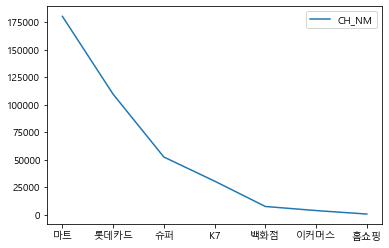

In [60]:
data.groupby('GENDER').get_group('남')['CH_NM'].value_counts().to_frame().plot()

In [59]:
import tqdm

<AxesSubplot:xlabel='GENDER,CH_NM'>

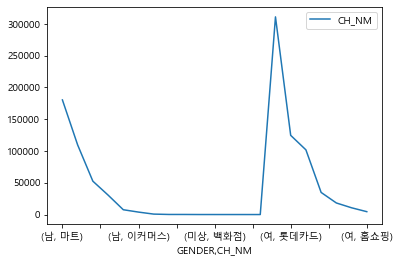

In [61]:
data.groupby('GENDER')['CH_NM'].value_counts().to_frame().plot()

In [93]:
pop = data.groupby('GENDER')['CH_NM'].value_counts().to_frame()
pop= pop.rename(columns={'CH_NM':'count'})
pop

count
GENDER CH_NM        
남      마트     180265
       롯데카드   109537
       슈퍼      52480
       K7      30600
       백화점      7560
       이커머스     3853
       홈쇼핑       690
미상     슈퍼        133
       마트        121
       K7         22
       백화점        18
       이커머스       13
       롯데카드        9
       홈쇼핑         3
여      마트     310904
       롯데카드   124567
       슈퍼     101751
       K7      34767
       백화점     18211
       이커머스    10632
       홈쇼핑      4520

남성이 K7과 롯데카드 사용 비중이 여성보다 높음

In [ ]:
pop['Trial'] = pop.index.get_level_values(0)

In [91]:
pop.index.get_level_values(0)

Index(['남', '남', '남', '남', '남', '남', '남', '미상', '미상', '미상', '미상', '미상', '미상',
       '미상', '여', '여', '여', '여', '여', '여', '여'],
      dtype='object', name='GENDER')

In [88]:
pop = pop.reset_index(inplace=True)

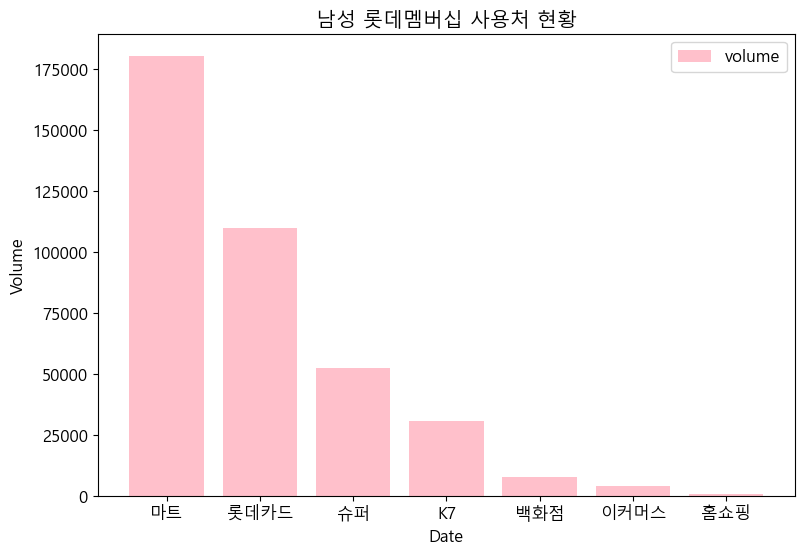

In [254]:
xs=data.groupby('GENDER').get_group('남')['CH_NM'].value_counts().to_frame().index.to_list() #플롯할 데이터 모두 list로 저장 
ys_volume=data.groupby('GENDER').get_group('남')['CH_NM'].value_counts().to_frame()['CH_NM'].to_list() 
plt.figure(figsize=(9, 6)) #전체 그래프 크기 설정 plt.subplot(2,1,1) 
#2행 1열에서 1번째 그래프 지정 

plt.bar(xs, ys_volume, color='pink', label='volume') #xy데이터 플롯-bar 
plt.xlabel('Date') #x축 이름 
plt.ylabel('Volume') #y축 이름 
plt.legend() #범례 표시
plt.title("남성 롯데멤버십 사용처 현황")
plt.show()

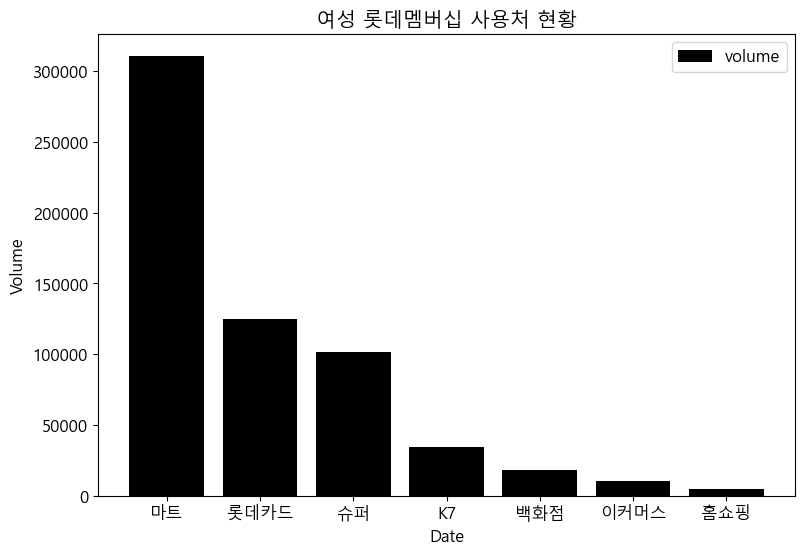

In [255]:
xs=data.groupby('GENDER').get_group('여')['CH_NM'].value_counts().to_frame().index.to_list() #플롯할 데이터 모두 list로 저장 
ys_volume=data.groupby('GENDER').get_group('여')['CH_NM'].value_counts().to_frame()['CH_NM'].to_list() 
plt.figure(figsize=(9, 6)) #전체 그래프 크기 설정 plt.subplot(2,1,1) 
#2행 1열에서 1번째 그래프 지정 

plt.title("여성 롯데멤버십 사용처 현황")
plt.bar(xs, ys_volume, color='black', label='volume') #xy데이터 플롯-bar 
plt.xlabel('Date') #x축 이름 
plt.ylabel('Volume') #y축 이름 
plt.legend() #범례 표시
plt.show()

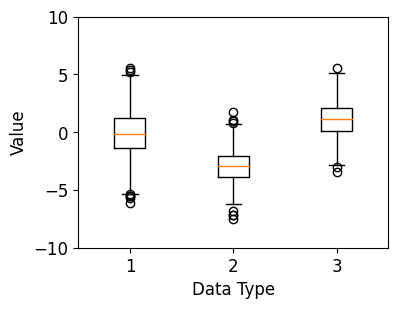

In [102]:
import matplotlib.pyplot as plt
import numpy as np

# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
np.random.seed(0)
data_a = np.random.normal(0, 2.0, 1000)
data_b = np.random.normal(-3.0, 1.5, 500)
data_c = np.random.normal(1.2, 1.5, 1500)

# 3. 그래프 그리기
fig, ax = plt.subplots()

ax.boxplot([data_a, data_b, data_c])
ax.set_ylim(-10.0, 10.0)
ax.set_xlabel('Data Type')
ax.set_ylabel('Value')

plt.show()

In [164]:
data.groupby('CH_NM')['AM'].sum().to_frame()
data.groupby('CH_NM')['CT'].sum().to_frame()
am = pd.merge(data.groupby('CH_NM')['AM'].sum().to_frame(), data.groupby('CH_NM')['CT'].sum().to_frame(), on ='CH_NM')
am

,AM,CT
CH_NM,,
K7,247425100,104651
롯데카드,9290793049,234113
마트,3559274606,1076548
백화점,3132605073,39622
슈퍼,685381874,207099
이커머스,801817174,21116
홈쇼핑,3732070000,59648


In [ ]:
am.columns=['amount','count']
am['averge'] = am['amount']/am['count']
am.columns=['amount','count','average_mn']
am

In [195]:
km = data.groupby('CH_NM')['CT'].count().to_frame()
km.columns = ['ct']
ko= pd.merge(am,km,on='CH_NM')
ko['averge_ct'] = ko['count']/ko['ct']

In [198]:
ko.columns = ['총구매액','구매개수','개별평균구매액','구매회수','1회당평균구매개수']
ko

,총구매액,구매개수,개별평균구매액,구매회수,1회당평균구매개수
CH_NM,,,,,
K7,247425100,104651,2364.287967,65389,1.600437
롯데카드,9290793049,234113,39685.079637,234113,1.000000
마트,3559274606,1076548,3306.192205,491290,2.191268
백화점,3132605073,39622,79062.265231,25789,1.536391
슈퍼,685381874,207099,3309.440770,154364,1.341628
이커머스,801817174,21116,37972.019985,14498,1.456477
홈쇼핑,3732070000,59648,62568.233637,5213,11.442164


홈쇼핑으로 대량 사재기하는 고객들이 있는듯함

In [166]:
data.iloc[data[data['AM']==data['AM'].max()].index]
data.iloc[data[data['CT']==data['CT'].max()].index]

,ID,CAR_YEAR,ENGINE,DETAIL,GENDER,AGE,SIDO,GUNGU,Unnamed: 8,CH_NM,...,STORE_SIDO,STORE_GUNGU,DATE,CTGR1,CTGR2,CTGR3,BRAND,PRD_NM,CT,AM
470299,RSM_18859,20MY,1.6 GTe,LE Plus,여,4549,경기,경기 파주시,NaN,홈쇼핑,...,-,-,20210622,스포츠패션,여성스포츠화,여성스포츠샌들/슬리퍼,스위스런,[공식]스위스런 아쿠아슈즈 성인/아동/키즈/커플/가족신발 20종 택1,1900,18430000


In [184]:
data.groupby([data['ENGINE'],data['DETAIL'],data['CH_NM']])['GENDER'].value_counts(normalize=True).unstack(level=2).T.to_excel("tby.xlsx", header=True)
data.groupby([data['ENGINE'],data['DETAIL'],data['CH_NM']])['AGE'].value_counts(normalize=True).unstack(level=2).T.to_excel("tby.xlsx", header=True)
data.groupby([data['ENGINE'],data['DETAIL'],data['CH_NM']])['SIDO'].value_counts(normalize=True).unstack(level=2).T.to_excel("tby.xlsx", header=True)
data.groupby([data['ENGINE'],data['DETAIL'],data['CH_NM']])['GUNGU'].value_counts(normalize=True).unstack(level=2).T.to_excel("tby.xlsx", header=True)
data.groupby([data['ENGINE'],data['DETAIL'],data['CH_NM']])['CH_NM'].value_counts(normalize=True).unstack(level=2).T.to_excel("tby.xlsx", header=True)
data.groupby([data['ENGINE'],data['DETAIL'],data['CH_NM']])['CTGR1'].value_counts(normalize=True).unstack(level=2).T.to_excel("tby.xlsx", header=True)
data.groupby([data['ENGINE'],data['DETAIL'],data['CH_NM']])['CTGR2'].value_counts(normalize=True).unstack(level=2).T.to_excel("tby.xlsx", header=True)
data.groupby([data['ENGINE'],data['DETAIL'],data['CH_NM']])['CTGR3'].value_counts(normalize=True).unstack(level=2).T.to_excel("tby.xlsx", header=True)

In [256]:
data.groupby([data['ENGINE'],data['DETAIL'],data['CH_NM']])['CTGR1'].value_counts(normalize=True).unstack(level=2).T

ENGINE   1.6 GTe                                                              \
DETAIL        LE                                                               
CTGR1         가구        가정      건강식품      건강용품      건해산물      계절가전   공구/안전용품   
CH_NM                                                                          
K7           NaN       NaN  0.000400  0.009996  0.002799       NaN  0.000400   
롯데카드         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
마트      0.000784       NaN  0.003540  0.001405  0.015729       NaN  0.004054   
백화점     0.000489  0.061125  0.000978       NaN       NaN       NaN       NaN   
슈퍼           NaN       NaN  0.002413  0.001999  0.015789       NaN  0.001103   
이커머스    0.011294       NaN  0.047228  0.020534  0.006160  0.006160  0.004107   
홈쇼핑     0.004717       NaN  0.049528  0.009434       NaN  0.004717       NaN   

ENGINE                                ...       TCe 260                      \
DETAIL                                ... RE Signature+                       
CTGR1         과일        과자 교육/교양/서비스  ...          냉동식품      냉장식품        담배   
CH_NM                                 ...                                     
K7      0.001599  0.110356       NaN  ...           NaN       NaN  0.333333   
롯데카드         NaN       NaN  0.072162  ...           NaN       NaN       NaN   
마트      0.057539  0.091106       NaN  ...      0.016393  0.081967       NaN   
백화점          NaN       NaN       NaN  ...           NaN       NaN       NaN   
슈퍼      0.065292  0.094457       NaN  ...           NaN  0.058824       NaN   
이커머스    0.019507  0.024641       NaN  ...           NaN       NaN       NaN   
홈쇼핑     0.004717  0.007075       NaN  ...           NaN       NaN       NaN   

ENGINE                                                                   
DETAIL                                                                   
CTGR1        대용식 여성의류       유제품      조리식품       조미료        주류       축산물  
CH_NM                                                                    
K7           NaN  NaN       NaN       NaN       NaN  0.333333       NaN  
롯데카드         NaN  NaN       NaN       NaN       NaN       NaN       NaN  
마트      0.131148  NaN  0.196721       NaN  0.114754  0.032787  0.032787  
백화점          NaN  1.0       NaN       NaN       NaN       NaN       NaN  
슈퍼      0.117647  NaN       NaN  0.058824  0.058824  0.235294  0.058824  
이커머스         NaN  NaN       NaN       NaN       NaN       NaN       NaN  
홈쇼핑          NaN  NaN       NaN       NaN       NaN       NaN       NaN  

[7 rows x 532 columns]

In [259]:
data.groupby(data['CH_NM'])['ENGINE'].value_counts(normalize=True).unstack(level=1).T.to_csv("tby.csv", mode='w', header=True)
data.groupby(data['CH_NM'])['DETAIL'].value_counts(normalize=True).unstack(level=1).T.to_csv("tby.csv", mode='a', header=True)
data.groupby(data['CH_NM'])['GENDER'].value_counts(normalize=True).unstack(level=1).T.to_csv("tby.csv", mode='a', header=True)
data.groupby(data['CH_NM'])['AGE'].value_counts(normalize=True).unstack(level=1).T.to_csv("tby.csv", mode='a', header=True)
data.groupby(data['CH_NM'])['SIDO'].value_counts(normalize=True).unstack(level=1).T.to_csv("tby.csv", mode='a', header=True)
data.groupby(data['CH_NM'])['GUNGU'].value_counts(normalize=True).unstack(level=1).T.to_csv("tby.csv", mode='a', header=True)
data.groupby(data['CH_NM'])['CH_NM'].value_counts(normalize=True).unstack(level=1).T.to_csv("tby.csv", mode='a', header=True)
data.groupby(data['CH_NM'])['CTGR1'].value_counts(normalize=True).unstack(level=1).T.to_csv("tby.csv", mode='a', header=True)
data.groupby(data['CH_NM'])['CTGR2'].value_counts(normalize=True).unstack(level=1).T.to_csv("tby.csv", mode='a', header=True)
data.groupby(data['CH_NM'])['CTGR3'].value_counts(normalize=True).unstack(level=1).T.to_csv("tby.csv", mode='a', header=True)


In [265]:
data.groupby(data['CH_NM'])['BRAND'].value_counts().unstack(level=1).T.fillna(0).nlargest(5, 'K7')

CH_NM,K7,롯데카드,마트,백화점,슈퍼,이커머스,홈쇼핑
BRAND,,,,,,,
롯데푸드,5431.0,0.0,3451.0,0.0,1931.0,17.0,0.0
케이티앤지,3884.0,0.0,14.0,0.0,427.0,0.0,0.0
농심,2607.0,0.0,16237.0,1.0,6188.0,97.0,0.0
롯데제과,2607.0,0.0,10197.0,0.0,6743.0,60.0,0.0
롯데칠성음료,2151.0,0.0,5024.0,0.0,2677.0,0.0,2.0


K7은 수입담배

In [268]:
data.groupby(data['CH_NM'])['BRAND'].value_counts().unstack(level=1).T.fillna(0).nlargest(5, '롯데카드')

CH_NM,K7,롯데카드,마트,백화점,슈퍼,이커머스,홈쇼핑
BRAND,,,,,,,
-,0.0,234113.0,17728.0,198.0,3296.0,4921.0,0.0
(문)반디앤루니스(면),0.0,0.0,0.0,11.0,0.0,0.0,0.0
"(임시)수원,오에스티(자)",0.0,0.0,0.0,1.0,0.0,0.0,0.0
"(임시)수원,위니비니(자)",0.0,0.0,0.0,1.0,0.0,0.0,0.0
"(임시)수지,원조공주떡집(자)",0.0,0.0,0.0,1.0,0.0,0.0,0.0


롯데카드의 경우 무슨 브랜드를 구매했는지 확인 불가

In [267]:
data.groupby(data['CH_NM'])['BRAND'].value_counts().unstack(level=1).T.fillna(0).nlargest(5, '백화점')

CH_NM,K7,롯데카드,마트,백화점,슈퍼,이커머스,홈쇼핑
BRAND,,,,,,,
나이키,0.0,0.0,48.0,920.0,0.0,125.0,23.0
기타사용품번,0.0,0.0,0.0,770.0,0.0,0.0,0.0
유니클로,0.0,0.0,370.0,747.0,0.0,0.0,0.0
아디다스,0.0,0.0,152.0,424.0,0.0,73.0,31.0
대향유통(면),0.0,0.0,0.0,299.0,0.0,0.0,0.0


In [269]:
data.groupby(data['CH_NM'])['BRAND'].value_counts().unstack(level=1).T.fillna(0).nlargest(5, '슈퍼')

CH_NM,K7,롯데카드,마트,백화점,슈퍼,이커머스,홈쇼핑
BRAND,,,,,,,
초이스엘,0.0,0.0,24174.0,1.0,9186.0,181.0,0.0
롯데제과,2607.0,0.0,10197.0,0.0,6743.0,60.0,0.0
브랜드불명,59.0,0.0,42379.0,0.0,6653.0,0.0,8.0
농심,2607.0,0.0,16237.0,1.0,6188.0,97.0,0.0
씨제이제일제당,836.0,0.0,15756.0,1.0,6025.0,139.0,20.0


In [270]:
data.groupby(data['CH_NM'])['BRAND'].value_counts().unstack(level=1).T.fillna(0).nlargest(5, '이커머스')

CH_NM,K7,롯데카드,마트,백화점,슈퍼,이커머스,홈쇼핑
BRAND,,,,,,,
-,0.0,234113.0,17728.0,198.0,3296.0,4921.0,0.0
초이스엘,0.0,0.0,24174.0,1.0,9186.0,181.0,0.0
온리프라이스,0.0,0.0,16819.0,0.0,62.0,167.0,0.0
삼성전자,0.0,0.0,0.0,7.0,0.0,157.0,38.0
씨제이제일제당,836.0,0.0,15756.0,1.0,6025.0,139.0,20.0


In [271]:
data.groupby(data['CH_NM'])['BRAND'].value_counts().unstack(level=1).T.fillna(0).nlargest(5, '홈쇼핑')

CH_NM,K7,롯데카드,마트,백화점,슈퍼,이커머스,홈쇼핑
BRAND,,,,,,,
조르쥬레쉬,0.0,0.0,0.0,0.0,0.0,0.0,173.0
폴앤조,0.0,0.0,0.0,0.0,0.0,0.0,128.0
라우렐,0.0,0.0,0.0,0.0,0.0,2.0,126.0
씨티지,0.0,0.0,0.0,0.0,0.0,0.0,67.0
지프,0.0,0.0,0.0,2.0,0.0,5.0,62.0


In [284]:
brand = data.groupby(data['CH_NM'])['BRAND'].value_counts().unstack(level=1).T.fillna(0)
brand['total'] = brand.sum(axis=1)

In [283]:
brand.nlargest(20, 'total')

CH_NM,K7,롯데카드,마트,백화점,슈퍼,이커머스,홈쇼핑,total
BRAND,,,,,,,,
-,0.000000,1.0,0.038554,0.007678,0.025802,0.339426,0.000000,1.411459
브랜드불명,0.000959,0.0,0.092163,0.000000,0.052081,0.000000,0.001578,0.146781
초이스엘,0.000000,0.0,0.052572,0.000039,0.071909,0.012484,0.000000,0.137005
농심,0.042387,0.0,0.035311,0.000039,0.048441,0.006691,0.000000,0.132869
롯데제과,0.042387,0.0,0.022176,0.000000,0.052785,0.004139,0.000000,0.121487
롯데푸드,0.088303,0.0,0.007505,0.000000,0.015116,0.001173,0.000000,0.112097
리얼후레쉬,0.000000,0.0,0.109504,0.000000,0.000000,0.000000,0.000000,0.109504
씨제이제일제당,0.013593,0.0,0.034265,0.000039,0.047165,0.009588,0.003945,0.108593
오뚜기,0.015788,0.0,0.032841,0.000000,0.040965,0.005518,0.000394,0.095505


In [285]:
brand.nlargest(20, 'total')

CH_NM,K7,롯데카드,마트,백화점,슈퍼,이커머스,홈쇼핑,total
BRAND,,,,,,,,
-,0.0,234113.0,17728.0,198.0,3296.0,4921.0,0.0,260256.0
리얼후레쉬,0.0,0.0,50353.0,0.0,0.0,0.0,0.0,50353.0
브랜드불명,59.0,0.0,42379.0,0.0,6653.0,0.0,8.0,49099.0
초이스엘,0.0,0.0,24174.0,1.0,9186.0,181.0,0.0,33542.0
농심,2607.0,0.0,16237.0,1.0,6188.0,97.0,0.0,25130.0
씨제이제일제당,836.0,0.0,15756.0,1.0,6025.0,139.0,20.0,22777.0
오뚜기,971.0,0.0,15101.0,0.0,5233.0,80.0,2.0,21387.0
롯데제과,2607.0,0.0,10197.0,0.0,6743.0,60.0,0.0,19607.0
온리프라이스,0.0,0.0,16819.0,0.0,62.0,167.0,0.0,17048.0


In [315]:
home= data.groupby('CH_NM').get_group('홈쇼핑')
home[['PRD_NM','CT','AM']].sort_values(by='AM',ascending=False).head(20)

,PRD_NM,CT,AM
58734,[세인트제임스]남녀공용 Guildo Elbow Patch(길도엘보패치) 중 택1,1033,90904000
139554,[자코모] 엘리쉬 4인 카우치형 기능성 슈렁큰 천연면피 소가죽 소파,24,45527520
29989,BURBERRY 프랭크비 퀼팅 자켓 (4062496/4062393/4062391/4...,40,42760000
139555,[자코모][가죽업그레이드] 엘리오Ⅰ 3.5인 카우치형 기능성 슈렁큰 천연면피 소가죽 소파,22,39230400
478458,[골든너겟]순금 바스켓 반지 11.25g,34,35360000
428087,BURBERRY 라임하우스 다운 롱 패딩 (8036220/8036218/8036221),12,24720000
111471,나무하나 에어 포지티브 스니커즈 (Air Positive sneakers),168,24553200
100655,[무료배송] 마운틴벨리 1+1 여름 아이스 쿨터치 기능성팬츠 02510,966,23087400
428089,BURBERRY 프랭크비 퀼팅 자켓 (4062496/4062393/4062391/4...,20,21560000
617040,노스페이스 여성 부띠 클래식 NS99K52,480,20851200


In [316]:
home= data.groupby('CH_NM').get_group('홈쇼핑')
home[['PRD_NM','CT','AM']].sort_values(by='CT',ascending=False).head(20)

,PRD_NM,CT,AM
470299,[공식]스위스런 아쿠아슈즈 성인/아동/키즈/커플/가족신발 20종 택1,1900,18430000
58734,[세인트제임스]남녀공용 Guildo Elbow Patch(길도엘보패치) 중 택1,1033,90904000
100655,[무료배송] 마운틴벨리 1+1 여름 아이스 쿨터치 기능성팬츠 02510,966,23087400
542015,시저 강아지캔 100g X12개/강아지 사료,870,13833000
922848,[벤포트] 남여 스타 퍼 스니커즈,480,14304000
617040,노스페이스 여성 부띠 클래식 NS99K52,480,20851200
617042,노스페이스 여성 부띠 클래식 NS99K52,448,19461120
617043,노스페이스 여성 부띠 클래식 NS99K52,448,19461120
467487,[쌍계명차] 일상다완 허니플라워 미니청 3입 세트(7종택3),343,12965400
287058,캐릭터 카미카 모음/타요 뽀로로 핑크퐁 아기상어 미니카 자동차 장난감 차,336,967680


In [318]:
home.count()

ID             5213
CAR_YEAR       5213
ENGINE         5213
DETAIL         5213
GENDER         5213
AGE            5213
SIDO           5212
GUNGU          5212
Unnamed: 8        0
CH_NM          5213
CH_NF          5213
STORE_NM       5213
STORE_SIDO     5213
STORE_GUNGU    5213
DATE           5213
CTGR1          5213
CTGR2          5213
CTGR3          5213
BRAND          5070
PRD_NM         5213
CT             5213
AM             5213
dtype: int64

In [350]:
home2 = data.groupby('CH_NM').get_group('백화점')
home2[['PRD_NM','BRAND','CTGR1','CT','AM']].sort_values(by='AM',ascending=False).head(20)

,PRD_NM,BRAND,CTGR1,CT,AM
471241,-,반클리프아펠,명품,2,32100000
563679,-,골든듀,잡화,3,26300000
1795,-,롤렉스,명품,1,15360000
1797,-,파네라이_스타일리더,명품,2,10134000
1794,-,브라이틀링,명품,2,10117500
1793,-,롤렉스,명품,1,9210000
317463,-,까르띠에,명품,1,9160000
220493,-,까르띠에,명품,1,8300000
598803,KBF 5540TB 흙소파,가보건강침대,가구,4,8220000
436559,-,데무,여성의류,2,7699980


명품x잡화 갑 2천만원 

In [348]:
idx = home2[['PRD_NM','CTGR1','CT','AM']].sort_values(by='AM',ascending=False).head(20).index

In [349]:
data.loc[idx]   

,ID,CAR_YEAR,ENGINE,DETAIL,GENDER,AGE,SIDO,GUNGU,Unnamed: 8,CH_NM,...,STORE_SIDO,STORE_GUNGU,DATE,CTGR1,CTGR2,CTGR3,BRAND,PRD_NM,CT,AM
471241,RSM_18924,20MY,TCe 260,RE Signature,여,4549,경기,경기 성남시 분당구,NaN,백화점,...,경기,경기 고양시 일산동구,20201204,명품,명품,해외보석,반클리프아펠,-,2,32100000
563679,RSM_22329,20MY,TCe 260,RE Signature,남,5054,경남,경남 진주시,NaN,백화점,...,경남,경남 창원시 성산구,20210328,잡화,보석,보석,골든듀,-,3,26300000
1795,RSM_00050,21MY,TCe 260,RE,여,3539,경기,경기 남양주시,NaN,백화점,...,서울,서울 송파구,20210515,명품,명품,해외시계,롤렉스,-,1,15360000
1797,RSM_00050,21MY,TCe 260,RE,여,3539,경기,경기 남양주시,NaN,백화점,...,경기,경기 고양시 일산동구,20210521,명품,명품,해외시계,파네라이_스타일리더,-,2,10134000
1794,RSM_00050,21MY,TCe 260,RE,여,3539,경기,경기 남양주시,NaN,백화점,...,경기,경기 고양시 일산동구,20210503,명품,명품,명보시계멀티샵,브라이틀링,-,2,10117500
1793,RSM_00050,21MY,TCe 260,RE,여,3539,경기,경기 남양주시,NaN,백화점,...,서울,서울 송파구,20210510,명품,명품,해외시계,롤렉스,-,1,9210000
317463,RSM_12937,20MY,TCe 260,RE Signature,남,5054,경남,경남 김해시,NaN,백화점,...,경기,경기 고양시 일산동구,20201105,명품,명품,해외보석,까르띠에,-,1,9160000
220493,RSM_09349,22MY,1.6 GTe,LE,남,5054,서울,서울 성동구,NaN,백화점,...,경기,경기 고양시 일산동구,20210513,명품,명품,해외보석,까르띠에,-,1,8300000
598803,RSM_24169,20MY,TCe 260,RE Signature,여,3539,부산,부산 남구,NaN,백화점,...,-,-,20210317,가구,침실가구,침대,가보건강침대,KBF 5540TB 흙소파,4,8220000
436559,RSM_17594,20MY,TCe 260,RE Signature,남,4549,울산,울산 울주군,NaN,백화점,...,울산,울산 남구,20201211,여성의류,캐주얼,캐릭터캐주얼,데무,-,2,7699980
